In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import os
from folium import plugins
import re
import io
import selenium
from selenium import webdriver
from PIL import Image
import time
from folium.plugins import MarkerCluster
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
os.getcwd()

'c:\\Users\\EonKim\\Desktop\\github\\khu seminar\\subway'

In [11]:
file = r'상가임대정보.xlsx'
subway = pd.read_excel(file, index_col = 0)

C:\Users\EonKim\anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


In [51]:
df = subway[subway['영업업종'] != '공실'].copy()
df['임대료'] = df['임대료'].apply(lambda x: 0 if type(x) == str else x)
df.fillna(0, inplace = True)

In [52]:
df['면적당_임대료'] = df.iloc[:,-1] // df.iloc[:,4]

In [55]:
price = df.groupby('호선').mean()['면적당_임대료']

In [65]:
price = price.sort_values(ascending=False)

In [67]:
np.mean(price)

139980.42068136914

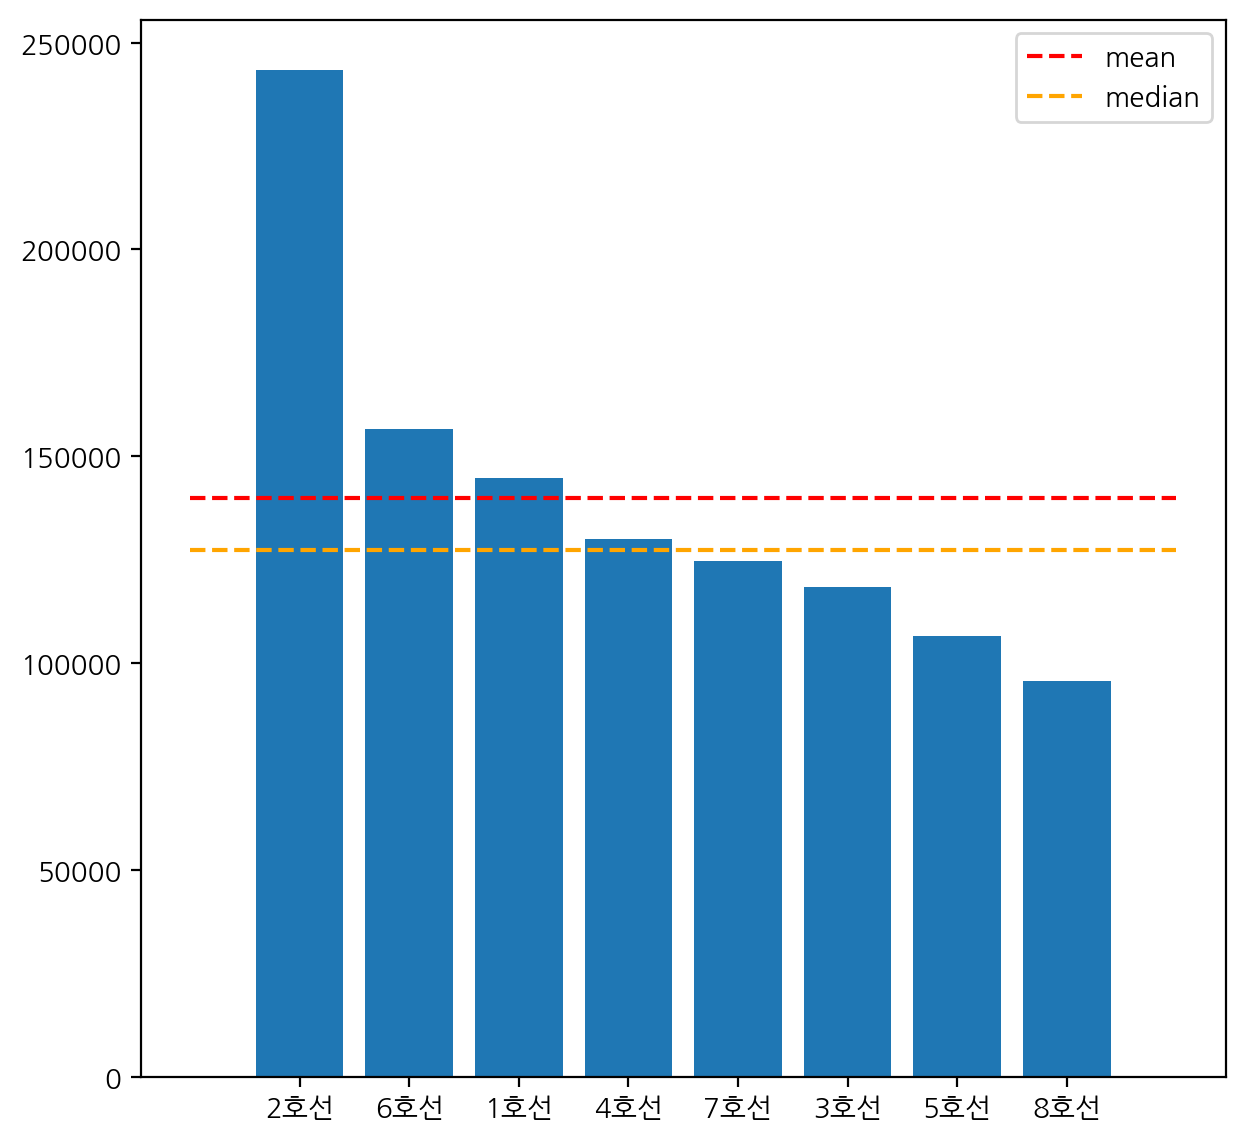

In [80]:
plt.figure(figsize = (7, 7), dpi = 200)
plt.bar(np.arange(len(price)), price)
plt.hlines(np.mean(price), -1, 8, linestyles='--', color = 'red', label= 'mean')
plt.hlines(np.median(price), -1, 8, linestyles='--', color = 'orange', label= 'median')
plt.xticks(np.arange(len(price)), labels = price.index)
plt.legend()
plt.savefig('평당 임대료.png')
plt.show()

In [81]:
subway

,상가유형,호선,역명,상가번호,면적(㎡),영업업종,보호업종,계약시작,계약종료,임대료
NO,,,,,,,,,,
1,개별(일반),1호선,서울(1)역,150107,33.00,사무실,NaN,2019-05-08,2024-06-06,527100
2,소송상가,1호선,서울(1)역,150109,12.00,미니샵A(커피전문점),NaN,2012-05-21,2017-07-10,5178550
3,네트워크,1호선,서울(1)역,150110,41.30,화장품,NaN,2015-09-05,2020-11-03,17414416
4,개별(일반),1호선,시청(1)역,151-101,29.73,의류,NaN,2017-04-04,2022-05-03,3858954
5,개별(일반),1호선,시청(1)역,151103,57.60,장애인생산품,NaN,2020-02-01,2025-01-31,1858300
...,...,...,...,...,...,...,...,...,...,...
1732,개별(일반),8호선,단대오거리역,823-203,54.03,분식,"기타잡화,편의점",2018-08-31,2023-09-29,7630000
1733,네트워크,8호선,단대오거리역,823-204,75.09,기타(잡화),"기타잡화,편의점",2016-05-23,2021-06-22,4284455
1734,네트워크,8호선,신흥역,824-101,40.00,편의점,편의점,2016-07-25,2021-11-17,6124682
